In [1]:
import os
import torch

import matplotlib.pyplot as plt
import numpy as np

from sparsecoding.data.datasets.field import FieldDataset
from sparsecoding import inference

from sparsecoding import models
from sparsecoding.visualization import plot_dictionary

### Define constants and load data

In [2]:
data_dir = "data/raw"
patch_size = 16

field_dataset = FieldDataset(
    root=data_dir,
    patch_size=patch_size,
)

torch.Size([512, 512, 10])


In [3]:
data = field_dataset.patches.reshape(-1, patch_size**2)

n_samples, n_features = data.shape

In [4]:
data.shape

torch.Size([10240, 256])

### Visualize patches

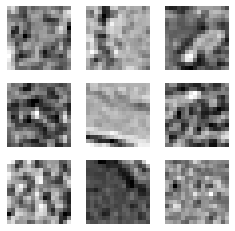

In [5]:
figure = plt.figure(figsize=(4,4))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img = (data[sample_idx])
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze().reshape([patch_size, patch_size]), cmap="gray")
plt.show()

In [6]:
### DEFINE MODEL
vanilla = inference.Vanilla()
sc = models.SimulSparseCoding(inference_method=vanilla,n_basis=n_features,sparsity_penalty=.01, n_features=n_features,inf_rate=.1)

<IPython.core.display.Javascript object>


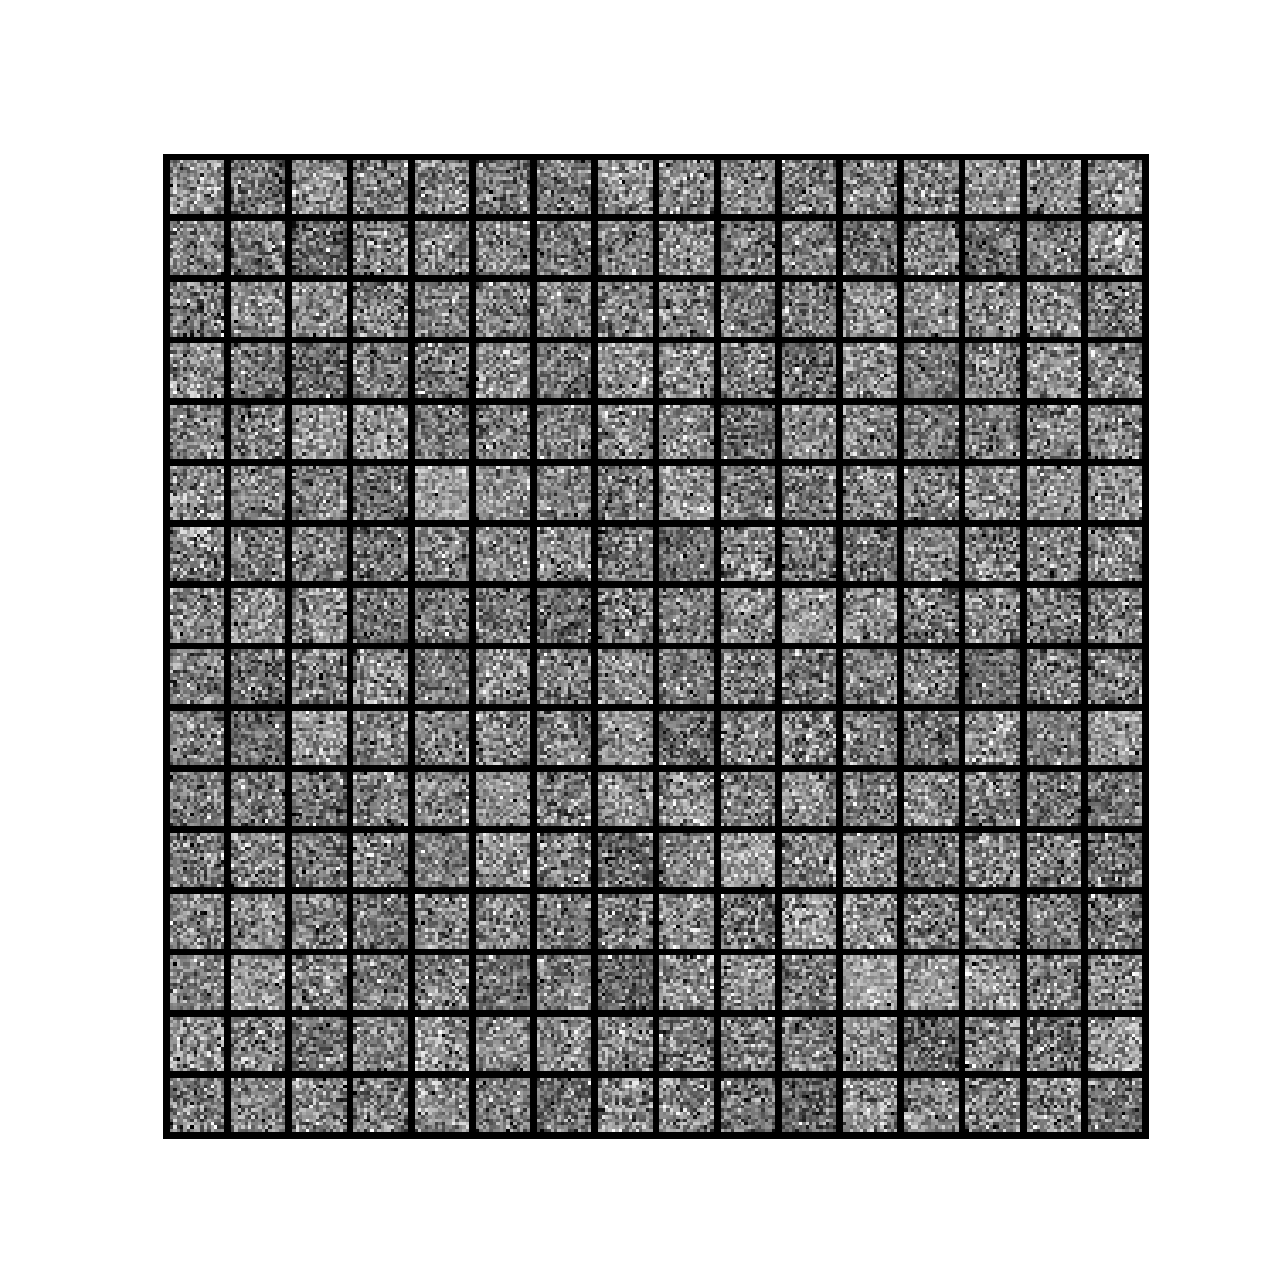

ValueError: sparsecoding error: nan in dictionary.

In [7]:
%matplotlib notebook

n_epoch = 100
montage_update_rate = 10

# Plot Updates
nrow = 16
fig,ax = plot_dictionary(sc.dictionary,nrow=nrow)

losses = np.array([])

for i in range(n_epoch//montage_update_rate):
    # learn dictionary
    loss = sc.simultaneous_update(data=data,batch_size=500)
    losses = np.concatenate([losses,loss])
    # update montage
    fig,ax = plot_dictionary(sc.dictionary,fig=fig,ax=ax,title='iteration: %d of %d'%(i*montage_update_rate,n_epoch),nrow=nrow)

fig,ax = plot_dictionary(sc.dictionary,fig=fig,ax=ax,title='iteration: %d of %d'%(n_epoch,n_epoch),nrow=nrow)

In [8]:
%debug

> /Users/andrewligeralde/projects/sparsecoding/sparsecoding/models.py(197)checknan()
    195             raise ValueError('sparsecoding error: nan in %s.'%(name))
    196         if torch.isnan(self.dictionary).any():
--> 197             raise ValueError('sparsecoding error: nan in dictionary.')
    198 
    199 

ipdb> t
*** NameError: name 't' is not defined
ipdb> i
*** NameError: name 'i' is not defined
ipdb> up
> /Users/andrewligeralde/projects/sparsecoding/sparsecoding/models.py(91)normalize_dictionary()
     89         '''
     90         self.dictionary = self.dictionary.div_(self.dictionary.norm(p=2,dim=0))
---> 91         self.checknan()
     92 
     93 

ipdb> up
> /Users/andrewligeralde/projects/sparsecoding/sparsecoding/models.py(268)simultaneous_update()
    266 
    267             # normalize dictionary
--> 268             self.normalize_dictionary()
    269 
    270             # compute current loss

ipdb> t
8
ipdb> exit
